In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [ ]:
heart_rate = ctrl.Antecedent(np.arange(40, 181, 1), 'heart_rate')
blood_pressure = ctrl.Antecedent(np.arange(60, 181, 1), 'blood_pressure')
body_temperature = ctrl.Antecedent(np.arange(34, 41, 0.1), 'body_temperature')
oxygen_saturation = ctrl.Antecedent(np.arange(80, 101, 1), 'oxygen_saturation')
blood_sugar = ctrl.Antecedent(np.arange(50, 251, 1), 'blood_sugar')


drug_dosage = ctrl.Consequent(np.arange(-10, 11, 1), 'drug_dosage')
fluid_adjustment = ctrl.Consequent(np.arange(-10, 11, 1), 'fluid_adjustment')
oxygen_therapy = ctrl.Consequent(np.arange(-10, 11, 1), 'oxygen_therapy')


In [ ]:

heart_rate['low'] = fuzz.trimf(heart_rate.universe, [40, 40, 60])
heart_rate['normal'] = fuzz.trimf(heart_rate.universe, [55, 75, 100])
heart_rate['high'] = fuzz.trimf(heart_rate.universe, [90, 140, 180])

blood_pressure['low'] = fuzz.trimf(blood_pressure.universe, [60, 60, 90])
blood_pressure['normal'] = fuzz.trimf(blood_pressure.universe, [85, 110, 140])
blood_pressure['high'] = fuzz.trimf(blood_pressure.universe, [130, 160, 180])

body_temperature['low'] = fuzz.trimf(body_temperature.universe, [34, 34, 36])
body_temperature['normal'] = fuzz.trimf(body_temperature.universe, [35.5, 36.5, 37.5])
body_temperature['high'] = fuzz.trimf(body_temperature.universe, [37.5, 39, 41])

oxygen_saturation['low'] = fuzz.trimf(oxygen_saturation.universe, [80, 80, 90])
oxygen_saturation['normal'] = fuzz.trimf(oxygen_saturation.universe, [89, 94, 100])

blood_sugar['low'] = fuzz.trimf(blood_sugar.universe, [50, 50, 70])
blood_sugar['normal'] = fuzz.trimf(blood_sugar.universe, [65, 100, 140])
blood_sugar['high'] = fuzz.trimf(blood_sugar.universe, [130, 180, 250])


drug_dosage['decrease'] = fuzz.trimf(drug_dosage.universe, [-10, -10, -3])
drug_dosage['maintain'] = fuzz.trimf(drug_dosage.universe, [-5, 0, 5])
drug_dosage['increase'] = fuzz.trimf(drug_dosage.universe, [3, 10, 10])

fluid_adjustment['decrease'] = fuzz.trimf(fluid_adjustment.universe, [-10, -10, -3])
fluid_adjustment['maintain'] = fuzz.trimf(fluid_adjustment.universe, [-5, 0, 5])
fluid_adjustment['increase'] = fuzz.trimf(fluid_adjustment.universe, [3, 10, 10])

oxygen_therapy['decrease'] = fuzz.trimf(oxygen_therapy.universe, [-10, -10, -3])
oxygen_therapy['maintain'] = fuzz.trimf(oxygen_therapy.universe, [-5, 0, 5])
oxygen_therapy['increase'] = fuzz.trimf(oxygen_therapy.universe, [3, 10, 10])


In [ ]:

rule1 = ctrl.Rule(heart_rate['low'] & blood_pressure['low'],
                  (fluid_adjustment['increase'], drug_dosage['increase']))
rule2 = ctrl.Rule(heart_rate['high'] & blood_pressure['high'], drug_dosage['decrease'])
rule3 = ctrl.Rule(heart_rate['normal'] & blood_pressure['normal'], drug_dosage['maintain'])
rule4 = ctrl.Rule(body_temperature['high'] & oxygen_saturation['low'],
                  (oxygen_therapy['increase'], drug_dosage['increase']))
rule5 = ctrl.Rule(body_temperature['normal'] & oxygen_saturation['normal'],
                  (oxygen_therapy['maintain'], drug_dosage['maintain']))
rule6 = ctrl.Rule(body_temperature['low'] & oxygen_saturation['low'],
                  (oxygen_therapy['increase'], fluid_adjustment['increase']))
rule7 = ctrl.Rule(blood_sugar['high'], drug_dosage['increase'])
rule8 = ctrl.Rule(blood_sugar['low'], drug_dosage['decrease'])
rule9 = ctrl.Rule(blood_sugar['normal'], drug_dosage['maintain'])
rule10 = ctrl.Rule(blood_pressure['high'] & blood_sugar['high'] & heart_rate['high'], drug_dosage['decrease'])
rule11 = ctrl.Rule(blood_pressure['low'] & oxygen_saturation['low'] & heart_rate['low'],
                   (fluid_adjustment['increase'], oxygen_therapy['increase'], drug_dosage['increase']))
rule12 = ctrl.Rule(body_temperature['high'] & blood_pressure['high'] & oxygen_saturation['normal'],
                   (drug_dosage['increase']))

In [ ]:

patient_monitoring_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,
                                             rule7, rule8, rule9, rule10, rule11, rule12])
patient_monitoring = ctrl.ControlSystemSimulation(patient_monitoring_ctrl)

In [ ]:

patient_monitoring.input['heart_rate'] = 50
patient_monitoring.input['blood_pressure'] = 85
patient_monitoring.input['body_temperature'] = 39
patient_monitoring.input['oxygen_saturation'] = 88
patient_monitoring.input['blood_sugar'] = 200

patient_monitoring.compute()

print(f"Liều dùng thuốc: {patient_monitoring.output['drug_dosage']:.1f} mg/IU")
print(f"Điều chỉnh dịch truyền: {patient_monitoring.output['fluid_adjustment']:.1f} ml/h")
print(f"Liệu pháp oxy: {patient_monitoring.output['oxygen_therapy']:.1f} L/phút")


Liều dùng thuốc: 7.5 mg/IU
Điều chỉnh dịch truyền: 6.8 ml/h
Liệu pháp oxy: 6.8 L/phút


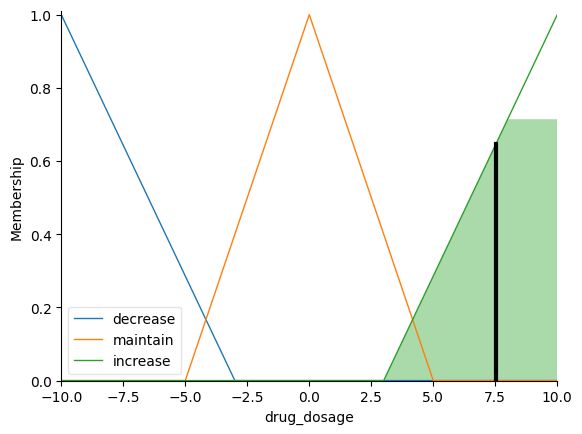

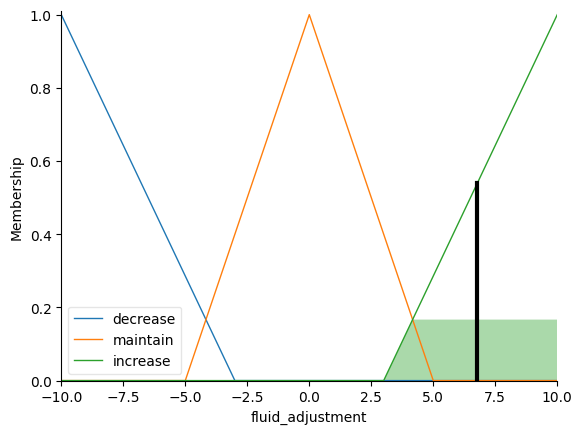

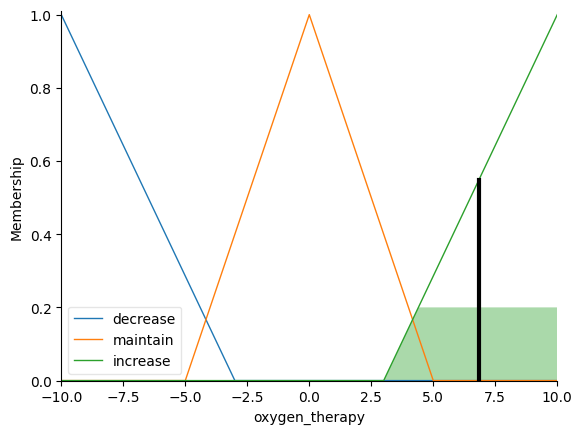

In [ ]:

drug_dosage.view(sim=patient_monitoring)
fluid_adjustment.view(sim=patient_monitoring)
oxygen_therapy.view(sim=patient_monitoring)
plt.show()
